In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris, load_breast_cancer, make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [18]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
log_clf = LogisticRegression(max_iter=10000, solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svc_clf = SVC(probability=False, gamma="scale", random_state=42)

In [20]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svc_clf)],
    voting='hard'
)

In [21]:
for clf in (log_clf, rnd_clf, svc_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.85
RandomForestClassifier 0.88
SVC 0.87
VotingClassifier 0.87


In [22]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')


In [23]:
for clf in (log_clf, rnd_clf, svc_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.85
RandomForestClassifier 0.88
SVC 0.87
VotingClassifier 0.89


In [24]:
# Bagging and Pasting
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [29]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42, oob_score=True)

In [30]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9


In [31]:
bag_clf.oob_decision_function_

array([[0.98670213, 0.01329787],
       [0.01066667, 0.98933333],
       [0.08974359, 0.91025641],
       [0.94670051, 0.05329949],
       [0.95886889, 0.04113111],
       [0.98994975, 0.01005025],
       [0.87002653, 0.12997347],
       [0.82479784, 0.17520216],
       [0.31524548, 0.68475452],
       [0.03768844, 0.96231156],
       [0.45454545, 0.54545455],
       [0.86683417, 0.13316583],
       [0.99744246, 0.00255754],
       [0.1425    , 0.8575    ],
       [0.47941889, 0.52058111],
       [0.93175853, 0.06824147],
       [0.97303922, 0.02696078],
       [0.99749373, 0.00250627],
       [0.84130982, 0.15869018],
       [0.2625    , 0.7375    ],
       [0.01578947, 0.98421053],
       [0.01842105, 0.98157895],
       [0.84343434, 0.15656566],
       [0.97022333, 0.02977667],
       [0.74603175, 0.25396825],
       [0.35356201, 0.64643799],
       [0.38560411, 0.61439589],
       [1.        , 0.        ],
       [0.01052632, 0.98947368],
       [0.02682927, 0.97317073],
       [0.

In [32]:
# RandomForestCLssifier VS BaggingClassifier + DecisionTreeClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)

In [33]:
bag_tree_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

In [37]:
from sklearn.model_selection import cross_val_predict

for clf in (rnd_clf, bag_tree_clf):
    clf.fit(X_train, y_train)
    # let's use cross_val_predict to get the oob_score
    y_pred = cross_val_predict(clf, X_train, y_train, cv=3, n_jobs=-1, method="predict", verbose=0)
    print(clf.__class__.__name__, accuracy_score(y_train, y_pred))

RandomForestClassifier 0.91
BaggingClassifier 0.92


In [38]:
# Feature Importance
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

In [39]:
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [40]:
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


In [ ]:
# Boosting

In [41]:
# let's use LinearRegression as the base estimator and RandomForestClassifier as the boosting classifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


log_clf = LogisticRegression(solver="lbfgs", random_state=42)
ada_clf = AdaBoostClassifier(
    log_clf, n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=42)

In [42]:
ada_clf.fit(X_train, y_train)

C:\Users\Tymur_Hilfatullin\Projects\ML\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=LogisticRegression(random_state=42),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [43]:
y_pred = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.85


In [ ]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)

In [ ]:
ada_clf.fit(X_train, y_train)

In [46]:
y_pred = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.89


In [60]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

In [48]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [49]:
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [50]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [51]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [52]:
X_new = np.array([[0.8]])

In [53]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [54]:
y_pred

array([0.75026781])

In [61]:
gbrt = GradientBoostingRegressor(max_depth=2, random_state=42, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [64]:
y_pred = gbrt.predict(X_new)
print(f'Predicted value: {y_pred}')

Predicted value: [0.75026781]


In [65]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

In [97]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

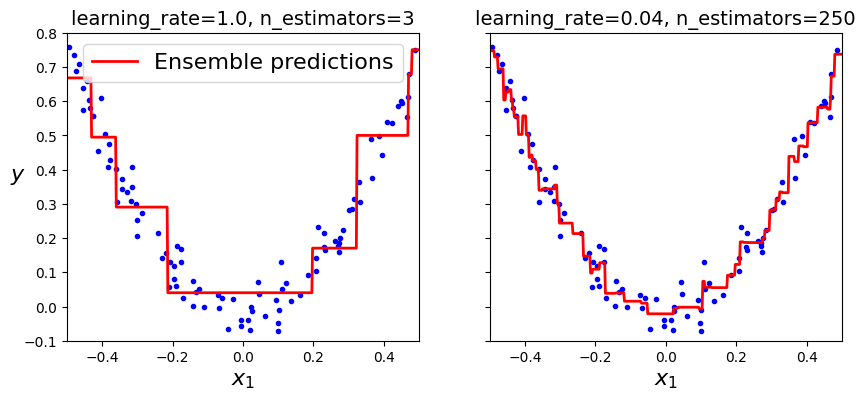

In [87]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

In [100]:
# let's find optimal n_estimators using early stopping
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

In [101]:
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [92]:
from sklearn.metrics import mean_squared_error

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
best_n_estimators = np.argmin(errors) + 1

In [93]:
best_n_estimators

56

In [94]:
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=56, random_state=42)

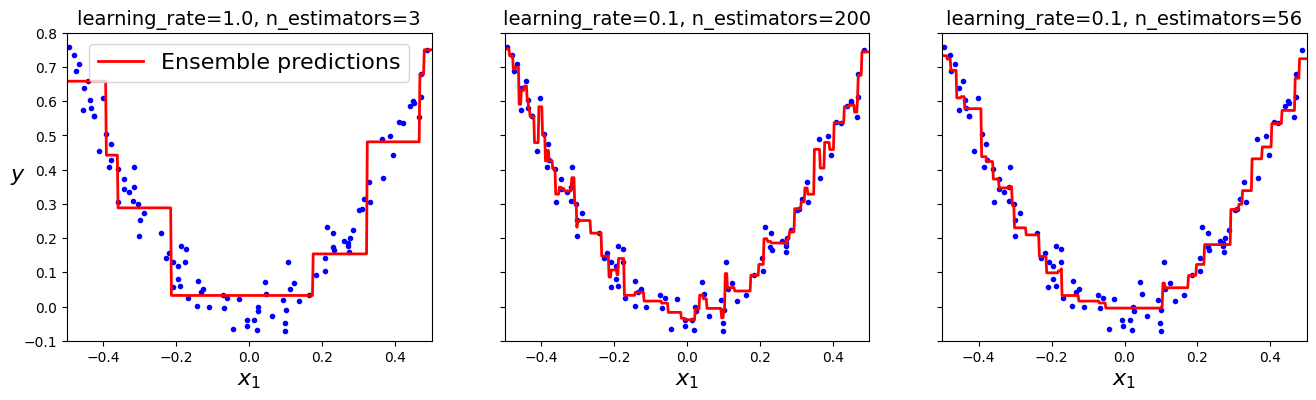

In [102]:
fix, axes = plt.subplots(ncols=3, figsize=(16,4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)

plt.sca(axes[2])
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_best.learning_rate, gbrt_best.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)

plt.show()